# Augmentacja danych.

Jest to technika pozwalająca na zwiększenie zbioru treningowego przez odpowiednie przekształcenia danych wejsciowych - tworzenie syntetycznych próbek obrazów w oparciu o już istniejące.

In [1]:
import matplotlib.pyplot as plt
from numpy import expand_dims
import tensorflow as tf

# podmoduł preprocessing z biblioteki Keras udostępnia nam kilka istotnych funkcji
from tensorflow.keras.preprocessing.image import load_img # ładowanie obrazu
from tensorflow.keras.preprocessing.image import img_to_array # konwersja zdjęcia do tablicy NumPy
from tensorflow.keras.preprocessing.image import ImageDataGenerator # generator obrazów

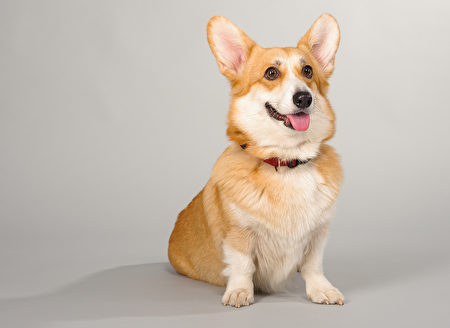

In [2]:
# ładujemy zdjęcie

img = load_img('corgi.jpg')
img

In [3]:
# konwersja na tablicę NumPy

data = img_to_array(img)
data.shape # wymiary - długość, szerokość, liczba kanałów RGB

(328, 450, 3)

In [4]:
data # obraz jest zapisany jako tensor

array([[[180., 176., 173.],
        [180., 176., 173.],
        [180., 176., 173.],
        ...,
        [227., 224., 219.],
        [227., 224., 219.],
        [227., 224., 219.]],

       [[180., 176., 173.],
        [180., 176., 173.],
        [180., 176., 173.],
        ...,
        [227., 224., 219.],
        [227., 224., 219.],
        [227., 224., 219.]],

       [[180., 176., 173.],
        [180., 176., 173.],
        [180., 176., 173.],
        ...,
        [227., 224., 219.],
        [227., 224., 219.],
        [227., 224., 219.]],

       ...,

       [[168., 164., 161.],
        [168., 164., 161.],
        [168., 164., 161.],
        ...,
        [188., 184., 181.],
        [188., 184., 183.],
        [188., 184., 183.]],

       [[168., 164., 161.],
        [168., 164., 161.],
        [168., 164., 161.],
        ...,
        [188., 184., 181.],
        [187., 183., 182.],
        [187., 183., 182.]],

       [[168., 164., 161.],
        [168., 164., 161.],
        [168., 1

In [5]:
# wycinamy po kolei kolory

data_red = data[:, :, 0]
data_green = data[:, :, 1]
data_blue = data[:, :, 2]

In [6]:
data_red

array([[180., 180., 180., ..., 227., 227., 227.],
       [180., 180., 180., ..., 227., 227., 227.],
       [180., 180., 180., ..., 227., 227., 227.],
       ...,
       [168., 168., 168., ..., 188., 188., 188.],
       [168., 168., 168., ..., 188., 187., 187.],
       [168., 168., 168., ..., 188., 187., 187.]], dtype=float32)

In [7]:
data_green

array([[176., 176., 176., ..., 224., 224., 224.],
       [176., 176., 176., ..., 224., 224., 224.],
       [176., 176., 176., ..., 224., 224., 224.],
       ...,
       [164., 164., 164., ..., 184., 184., 184.],
       [164., 164., 164., ..., 184., 183., 183.],
       [164., 164., 164., ..., 184., 183., 183.]], dtype=float32)

In [8]:
data_blue

array([[173., 173., 173., ..., 219., 219., 219.],
       [173., 173., 173., ..., 219., 219., 219.],
       [173., 173., 173., ..., 219., 219., 219.],
       ...,
       [161., 161., 161., ..., 181., 183., 183.],
       [161., 161., 161., ..., 181., 182., 182.],
       [161., 161., 161., ..., 181., 182., 182.]], dtype=float32)

In [9]:
# zdjęcie musimy rozszerzyć o jeden wymiar, aby załadować go do generatora

samples = expand_dims(data, 0)
samples.shape # będzie to tensor, którego pierwszym wymiarem jest liczba próbek w naszych danych

(1, 328, 450, 3)

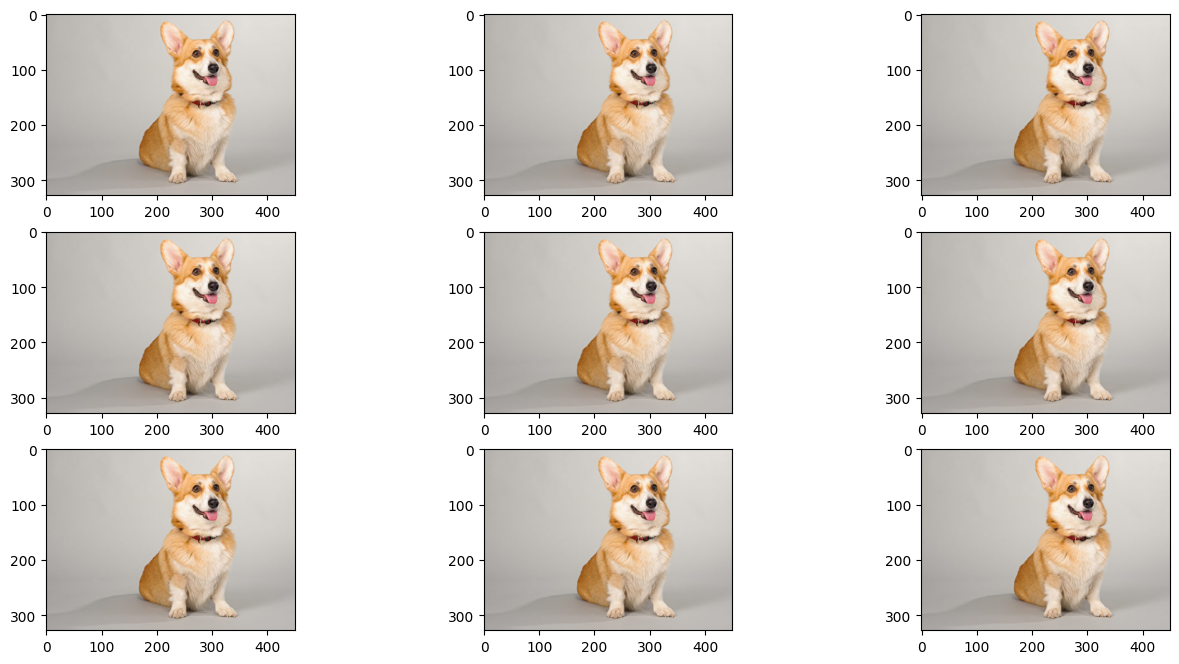

In [10]:
datagen = ImageDataGenerator() # instancja generatora

iterator = datagen.flow(samples, batch_size=1) # konstruujemy iterator
# ponieważ klasa ta podczas treningu generuje dane w locie

# zobrazowanie próbek na wykresie
plt.figure(figsize=(16, 8))
for i in range(9):
    plt.subplot(330 + i + 1)
    batch = next(iterator)
    image = batch[0].astype('uint8')
    plt.imshow(image)
plt.show()

# generator generuje cały czas to samo zdjęcie, bowiem nie podaliśmy mu żadnych parametrów

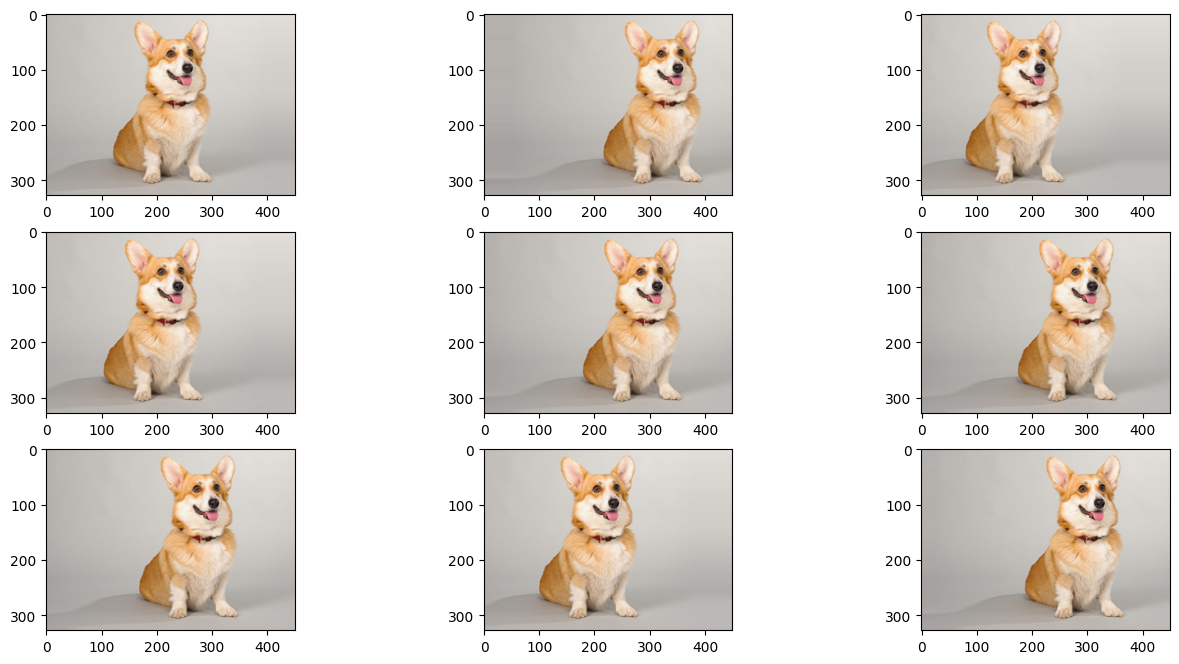

In [11]:
datagen = ImageDataGenerator(height_shift_range=0.3)
# ustawiony parametr pozwoli na przesuwanie zdjęć w lewo bądź prawo o losową wartość, lecz nie więcej niż o 30% zdjęcia
# to, co pozostaje po przesunięciu zdjęcia, jest interpolowane - przesunięciu przypisana jest najbliższa wartość

iterator = datagen.flow(samples, batch_size=1)

plt.figure(figsize=(16, 8))
for i in range(9):
    plt.subplot(330 + i + 1)
    batch = next(iterator)
    image = batch[0].astype('uint8')
    plt.imshow(image)
plt.show()

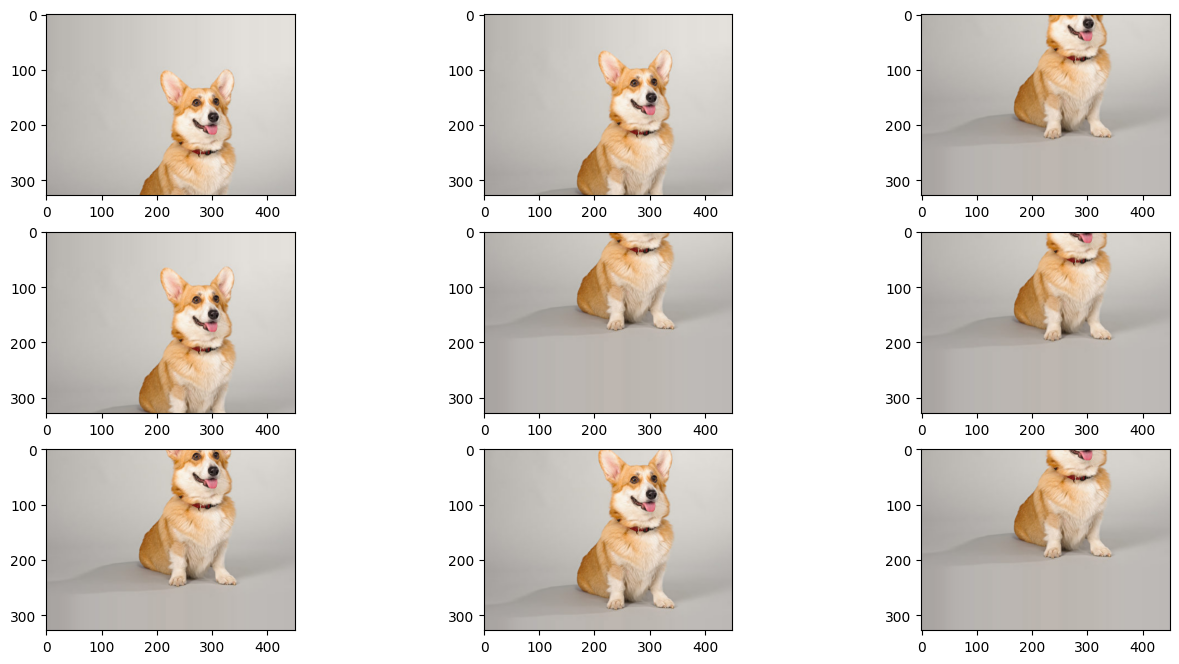

In [12]:
datagen = ImageDataGenerator(width_shift_range=0.3) # parametr działający podobnie, ale przesuwa w górę i w dół o podaną wartość + interpoluje

iterator = datagen.flow(samples, batch_size=1)

plt.figure(figsize=(16, 8))
for i in range(9):
    plt.subplot(330 + i + 1)
    batch = next(iterator)
    image = batch[0].astype('uint8')
    plt.imshow(image)
plt.show()

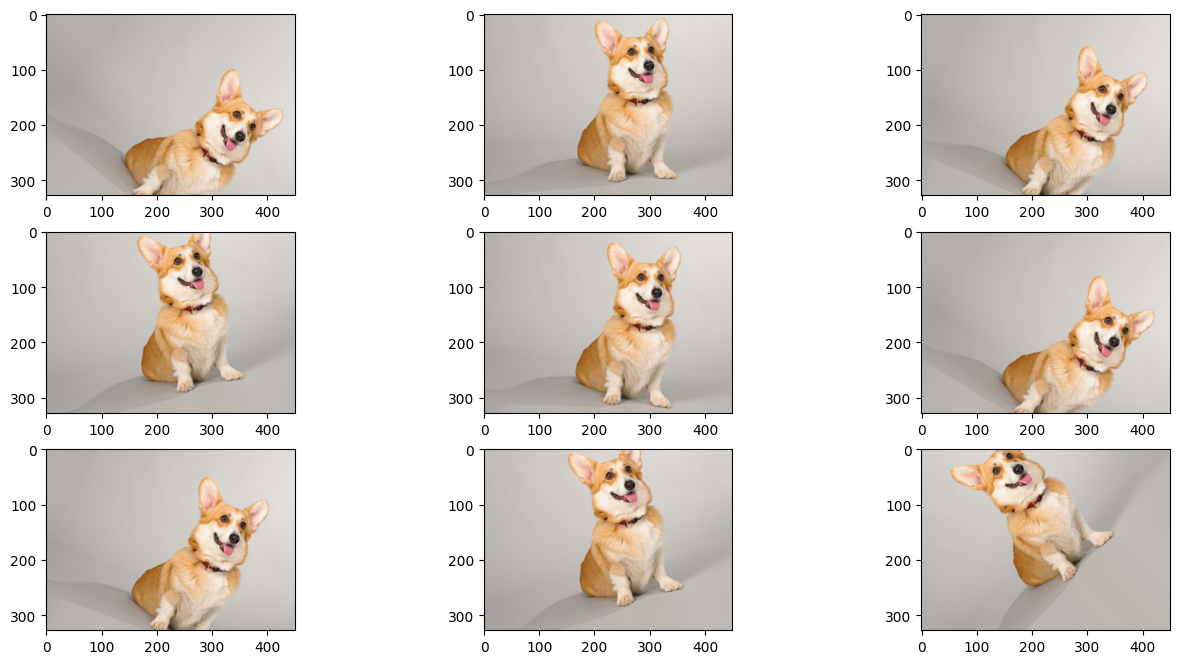

In [13]:
datagen = ImageDataGenerator(rotation_range=45) # obrócenie zdjęcia o maksymalnie podany kąt w stopniach
# w dowolną stronę

iterator = datagen.flow(samples, batch_size=1)

plt.figure(figsize=(16, 8))
for i in range(9):
    plt.subplot(330 + i + 1)
    batch = next(iterator)
    image = batch[0].astype('uint8')
    plt.imshow(image)
plt.show()

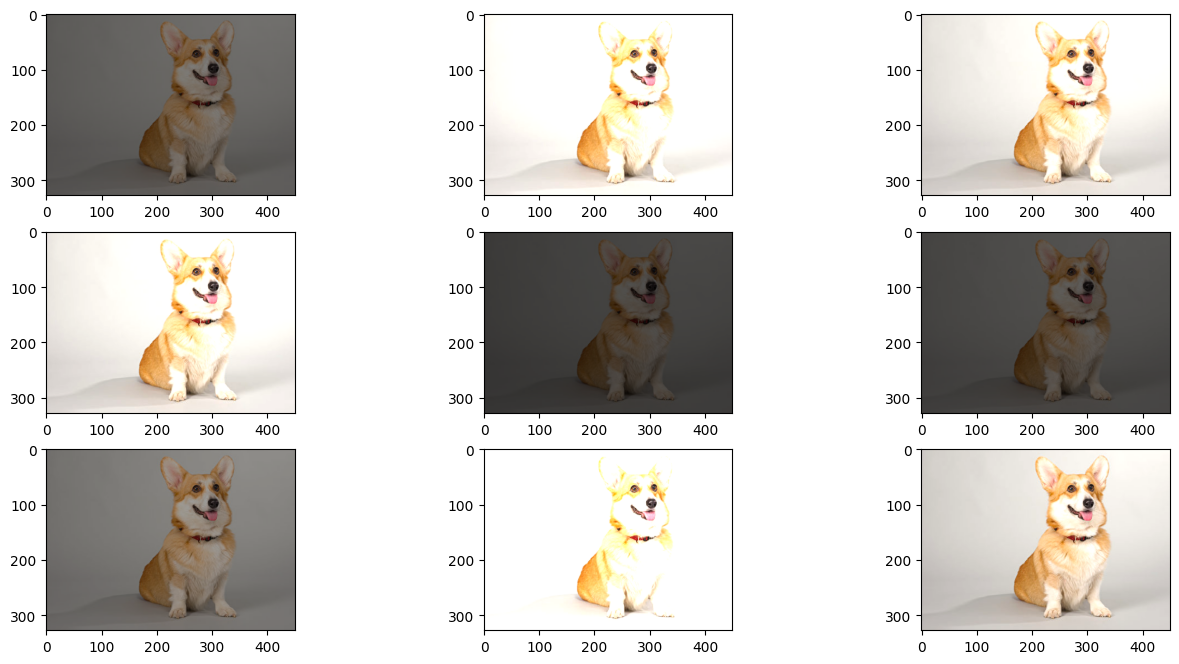

In [14]:
datagen = ImageDataGenerator(brightness_range=[0.1, 1.8]) # modyfikacja jasności
# w ww. wypadku od 10 do 180% jasności oryginału

iterator = datagen.flow(samples, batch_size=1)

plt.figure(figsize=(16, 8))
for i in range(9):
    plt.subplot(330 + i + 1)
    batch = next(iterator)
    image = batch[0].astype('uint8')
    plt.imshow(image)
plt.show()

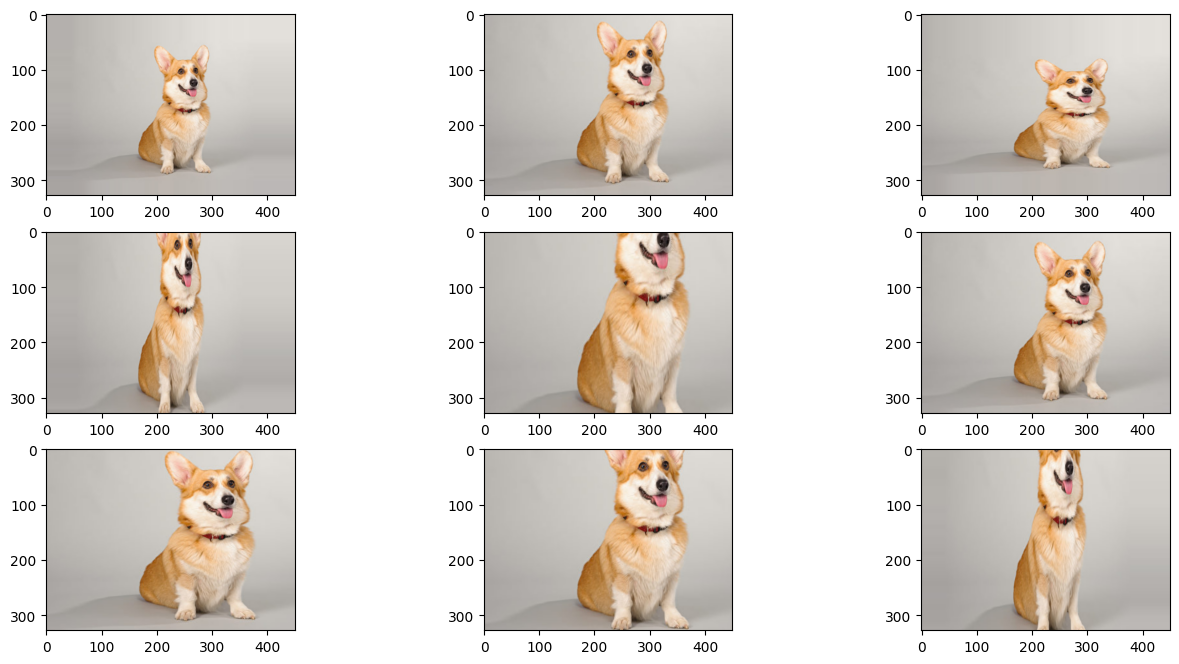

In [15]:
datagen = ImageDataGenerator(zoom_range=0.5) # powiększenie/oddalenie obrazu

iterator = datagen.flow(samples, batch_size=1)

plt.figure(figsize=(16, 8))
for i in range(9):
    plt.subplot(330 + i + 1)
    batch = next(iterator)
    image = batch[0].astype('uint8')
    plt.imshow(image)
plt.show()

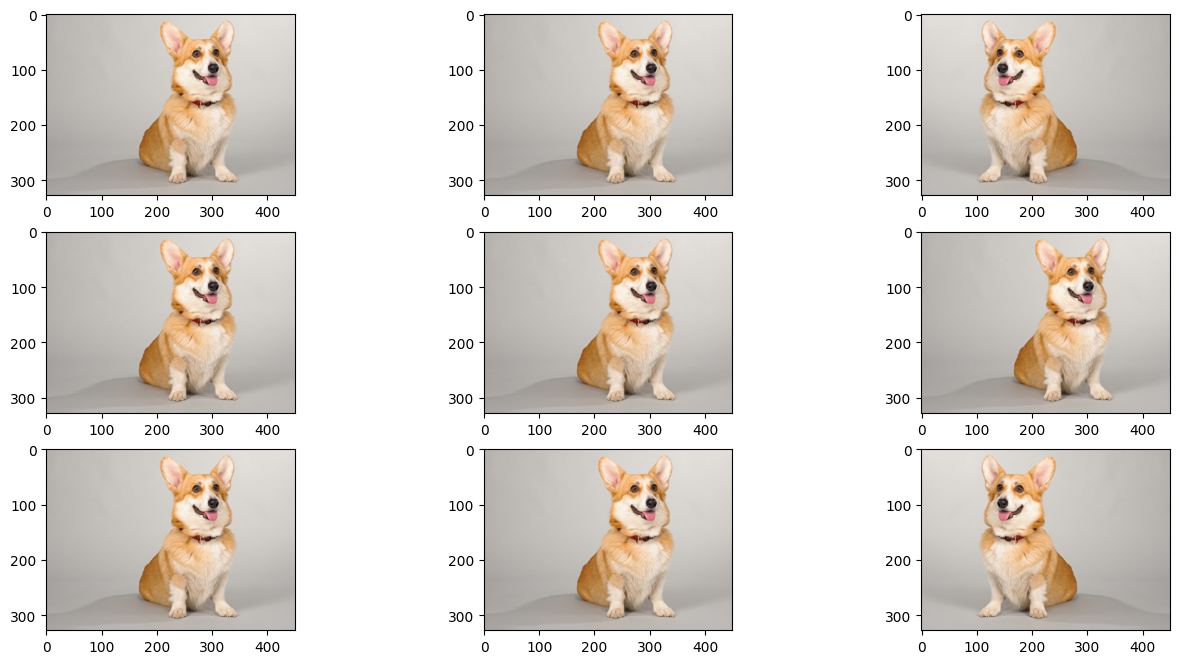

In [16]:
datagen = ImageDataGenerator(horizontal_flip=True) # obrócenie w pionie

iterator = datagen.flow(samples, batch_size=1)

plt.figure(figsize=(16, 8))
for i in range(9):
    plt.subplot(330 + i + 1)
    batch = next(iterator)
    image = batch[0].astype('uint8')
    plt.imshow(image)
plt.show()

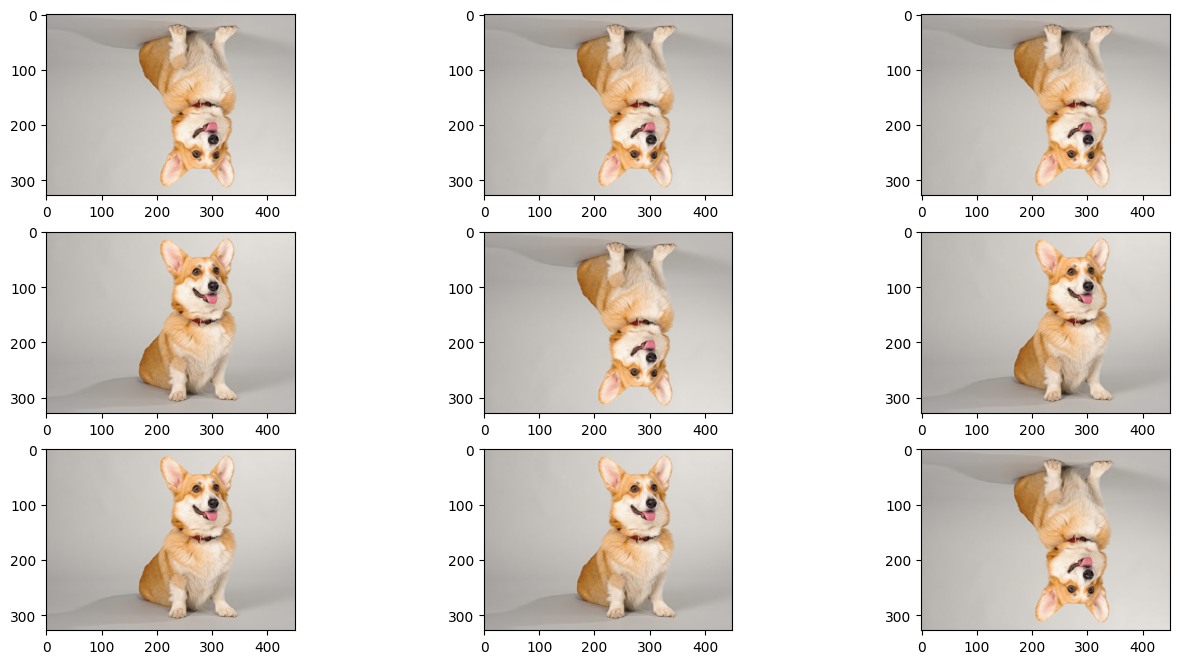

In [17]:
datagen = ImageDataGenerator(vertical_flip=True) # obrócenie w poziomie

iterator = datagen.flow(samples, batch_size=1)

plt.figure(figsize=(16, 8))
for i in range(9):
    plt.subplot(330 + i + 1)
    batch = next(iterator)
    image = batch[0].astype('uint8')
    plt.imshow(image)
plt.show()

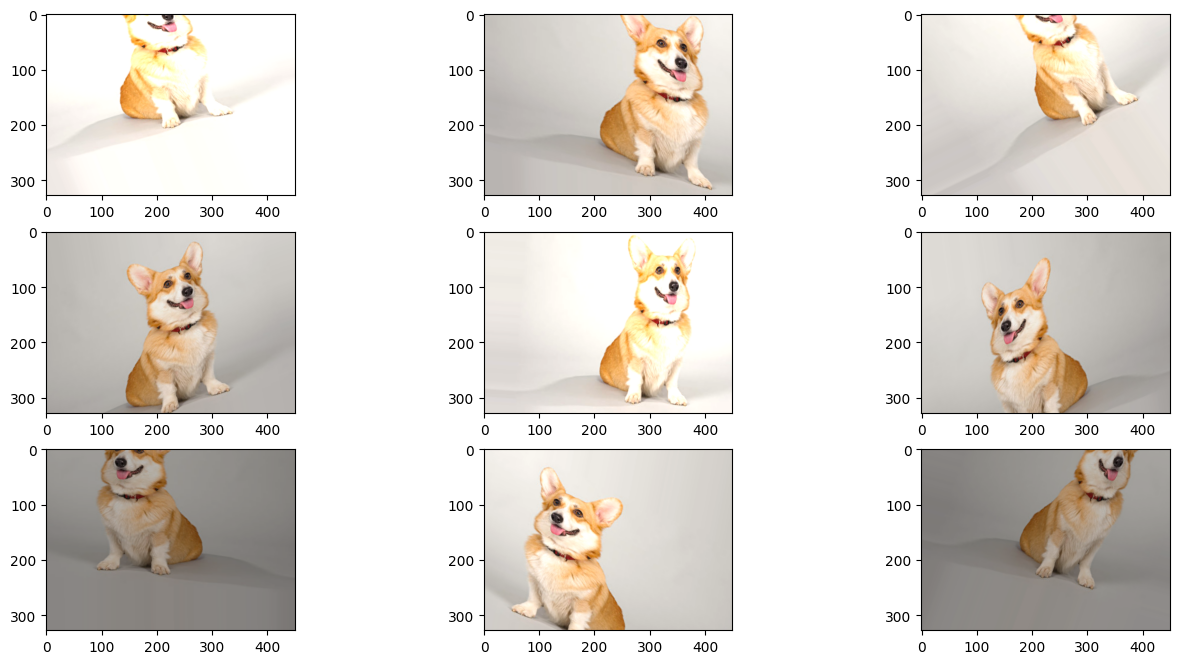

In [18]:
# i jeszcze raz podsumujmy wszystkie parametry

datagen = ImageDataGenerator(width_shift_range=0.2,
                             height_shift_range=0.2,
                             rotation_range=30,
                             brightness_range=[0.4, 1.5],
                             shear_range=20,
                             zoom_range=0.1,
                             horizontal_flip=True)

iterator = datagen.flow(samples, batch_size=1)

plt.figure(figsize=(16, 8))
for i in range(9):
    plt.subplot(330 + i + 1)
    batch = next(iterator)
    image = batch[0].astype('uint8')
    plt.imshow(image)
plt.show()

Takie operacje pozwalają nam na dodawanie nowych próbek danych, dzięki którym model lepiej wyuczy się rozpoznawać pożądane przez nas etykiety.

**UWAGA!** W tym notatniku podążałem zgodnie z kursem, jednak trzeba przy tym koniecznie wspomnieć o niezwykle istotnej kwestii. Otóż klasa ImageDataGenerator została oznaczona jako przestarzała w TensorFlow 2.9 i nie jest zalecana do użycia w nowym kodzie. Możemy go zastąpić nowoczesnym podejściem przy użyciu tf.keras.layers do augmentacji danych bezpośrednio w modelu, jak poniżej:

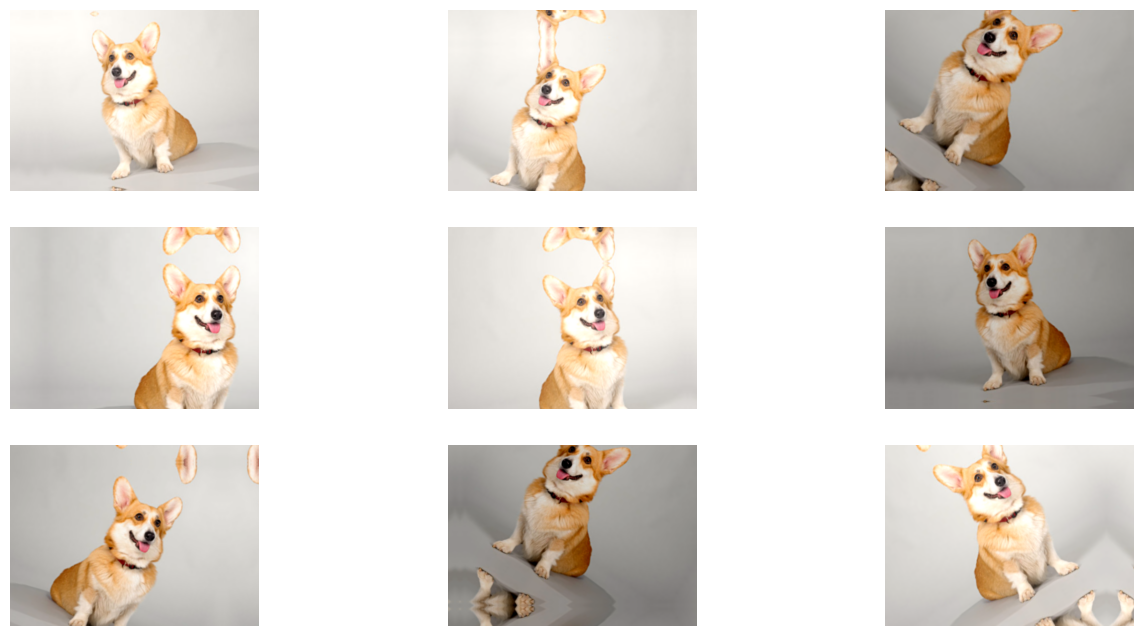

In [19]:
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom, RandomBrightness, RandomContrast, RandomTranslation
from tensorflow.keras.models import Sequential

img = load_img('corgi.jpg')
img_array = img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Dodanie wymiaru batch_size

# Definicja warstw augmentacyjnych
data_augmentation = Sequential([
    RandomFlip("horizontal"),
    RandomRotation(0.1),
    RandomZoom(0.1),
    RandomBrightness(0.2),
    RandomContrast(0.2),
    RandomTranslation(height_factor=0.2, width_factor=0.2)
])

# Generowanie i wizualizacja przykładów augmentacji
plt.figure(figsize=(16, 8))
for i in range(9):
    augmented_img = data_augmentation(img_array, training=True)  # Augmentacja obrazu
    augmented_img = tf.clip_by_value(augmented_img, 0, 255)  # Ograniczenie wartości do zakresu [0,255]
    augmented_img = tf.cast(augmented_img[0], tf.uint8)  # Konwersja do uint8 dla poprawnego wyświetlania
    plt.subplot(330 + i + 1)
    plt.imshow(augmented_img)  # Wyświetlanie obrazu
    plt.axis("off")
plt.show()